In [1]:
from functions import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[5])

# 7.1. Harris Corner Detector

7.1.1. Extract interest points using the Harris Corner detector that you implemented. In this way, apply the Harris Corner 
detector for at least 4 different scales. Which interest points do you observe to be detected across all these 
different scales? Notice that your implementation should allow for any suitable scale as input, however you can 
show results on a minimum of 4 different scales (Test on harris.JPG Image).


# 7.2. Scene stitching with SIFT/SURF features

7.2.1. Use the OpenCV, Python, and MATLAB implementation of the SIFT or SURF operator to find interest points and 
establish correspondences between the images. In this case you can directly compare the feature vectors of 
interest points. You will match and align between different views of a scene with SIFT/SURF features. Discuss 
results and demonstrates the output of each method separately (Test on sl,sm,sr.jpg images).

In [2]:
# construct a SIFT object
sift = cv2.SIFT_create()

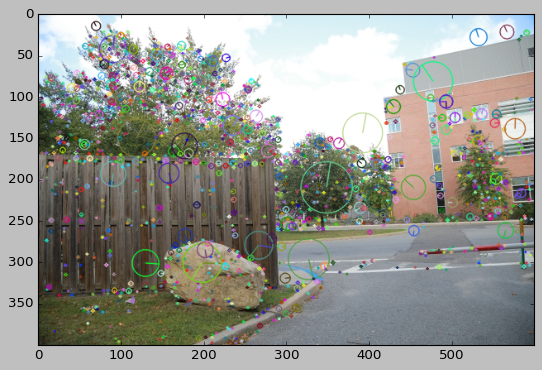

In [3]:
sl = cv2.imread('sl.jpg')
sl = cv2.cvtColor(sl, cv2.COLOR_BGR2RGB)
sl_gray = cv2.cvtColor(sl, cv2.COLOR_BGR2GRAY)

# find keypoints and descriptors
sl_kp , sl_desc = sift.detectAndCompute(sl_gray.copy(),None)

# draws the small circles on the locations of keypoints
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS --> show keypoints orientation, also stronger keypoints get bigger circles
img=cv2.drawKeypoints(sl.copy(),sl_kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)



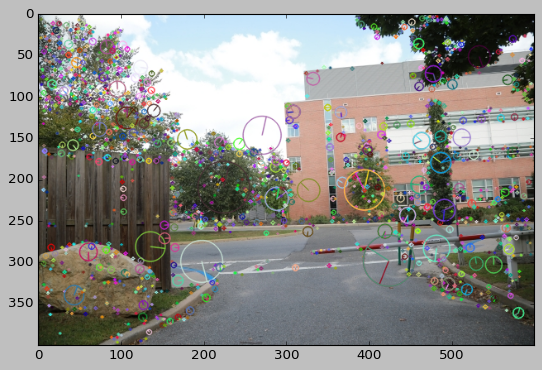

In [4]:
sm = cv2.imread('sm.jpg')
sm = cv2.cvtColor(sm, cv2.COLOR_BGR2RGB)
sm_gray = cv2.cvtColor(sm, cv2.COLOR_BGR2GRAY)

sm_kp, sm_desc = sift.detectAndCompute(sm_gray.copy(),None)

img=cv2.drawKeypoints(sm.copy(),sm_kp,sm,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)


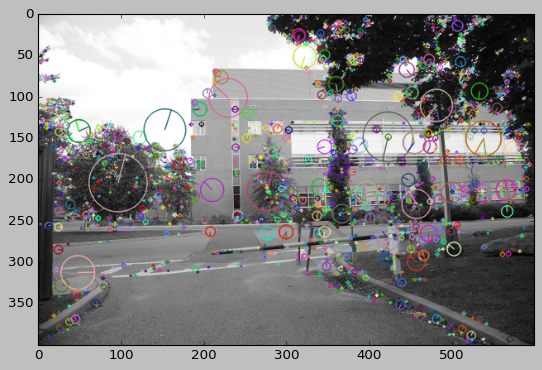

In [5]:
sr = cv2.imread('sr.jpg')
sr = cv2.cvtColor(sr, cv2.COLOR_BGR2RGB)
sr_gray = cv2.cvtColor(sr, cv2.COLOR_BGR2GRAY)

sr_kp , sr_desc = sift.detectAndCompute(sr_gray.copy(),None)

img=cv2.drawKeypoints(sr_gray.copy(),sr_kp,sr,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

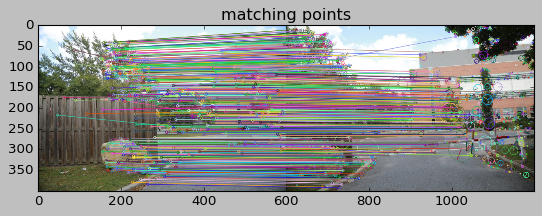

35.55291319857313
inliers/matches: 4/598
stiching image ...


  0%|          | 0/474 [00:00<?, ?it/s]

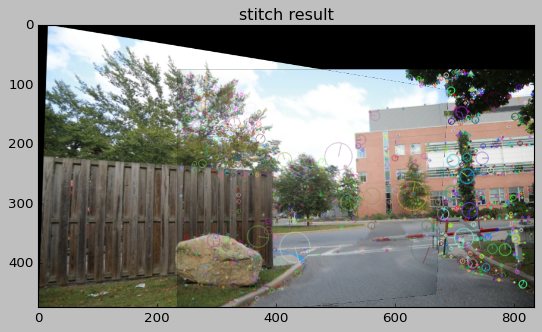

In [6]:
# find similar interest points of sl and sm
good_matches , matches1to2 , mGoodTuple = BruteForceMatcher(sl_desc,sm_desc)


matches = []
for pair in good_matches:
    matches.append(list(sl_kp[pair.queryIdx].pt + sm_kp[pair.trainIdx].pt))

matches = np.array(matches)

# match similar interest points of sl and sm, show them on image
sl_sm = cv2.drawMatchesKnn(sl.copy(),sl_kp,sm.copy(),sm_kp,matches1to2,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(sl_sm)
plt.title('matching points')
plt.show()

# compute similarity percent of sl and sm
print(howSimilar(sl_kp,sm_kp,good_matches))

inliers, H = ransac(matches, 0.5, 2000)


plt.imshow(stitch(sl, sm, H))
# plt.imshow(result)
plt.title('stitch result')
plt.show()

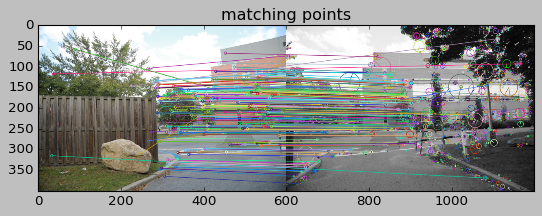

17.25219573400251


TypeError: stitch() takes 3 positional arguments but 5 were given

In [7]:
# find similar interest points of sl and sr
good_matches , matches1to2 , mGoodTuple = BruteForceMatcher(sl_desc,sr_desc)

# match similar interest points of sl and sr, show them on image
sl_sr = cv2.drawMatchesKnn(sl,sl_kp,sr,sr_kp,matches1to2,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(sl_sr)
plt.title('matching points')
plt.show()


# compute similarity percent of sl and sr
print(howSimilar(sl_kp,sr_kp,good_matches))

result = stitch(good_matches,sl_kp,sr_kp,sl,sr)
plt.imshow(result)
plt.title('stitch result')
plt.show()

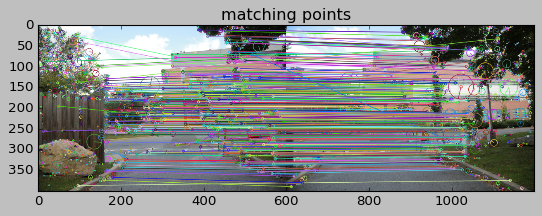

33.31242158092848
[[275.7071838378906, 264.2359313964844], [356.4991149902344, 222.7399139404297], [268.87982177734375, 181.96681213378906]]
[[154.9723358154297, 264.315673828125], [240.18649291992188, 223.11111450195312], [150.66998291015625, 178.10989379882812]]


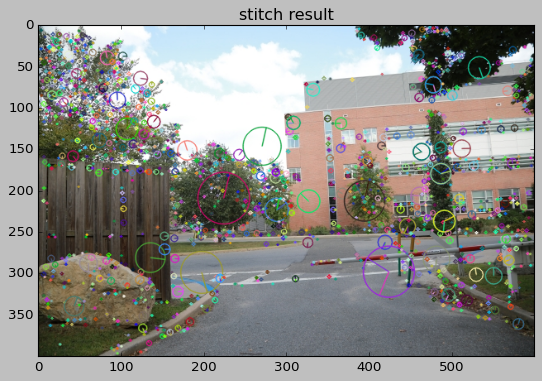

In [ ]:
# find similar interest points of sm and sr
good_matches , matches1to2 , mGoodTuple = BruteForceMatcher(sm_desc,sr_desc)

# match similar interest points of sm and sr, show them on image
sm_sr = cv2.drawMatchesKnn(sm,sm_kp,sr,sr_kp,matches1to2,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(sm_sr)
plt.title('matching points')
plt.show()


# compute similarity percent of sm and sr
print(howSimilar(sm_kp,sr_kp,good_matches))

result = stitch(good_matches,sm_kp,sr_kp,sm,sr)
plt.imshow(result)
plt.title('stitch result')
plt.show()

In [ ]:
# https://gist.github.com/njanirudh/653c597e508c8658738c1742b1ba3f22
# https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

In [ ]:
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
# surf = cv2.xfeatures2d.SURF_create(400)

7.2.2. Do these steps by images that are taken with your own camera as well.